# Spaceship Titanic

### Installing Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading and understanding data

In [10]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [11]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_test.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


Let's see value count of categorical variables.

In [17]:
df_train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [19]:
df_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [18]:
df_train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

We will check for any missing values.

In [16]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Exploratory Data Analysis

### Missing Data

Around 2 % of our data is missing in almost all the columns, but let's see how the nulls are located.

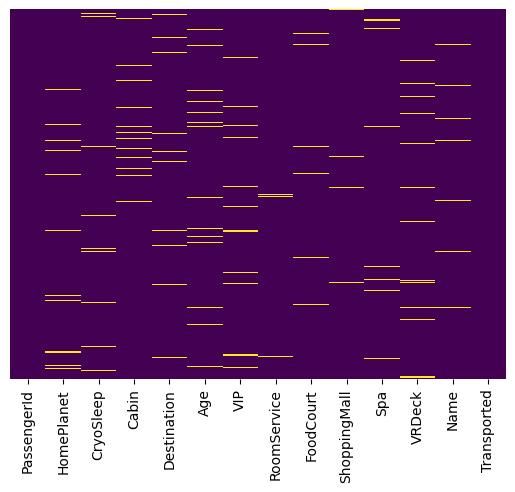

In [23]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Missing values are spread out around the whole dataset quite evenly. 
I realized we cannot drop them, because the test data as well has them, and if we drop them there, we will be missing some labels. Therefore, our score will go down. We'll have to impute with the most reasonable values.

Let's visualize more data. I will be analysing only the train dataset but making changes in both of them.

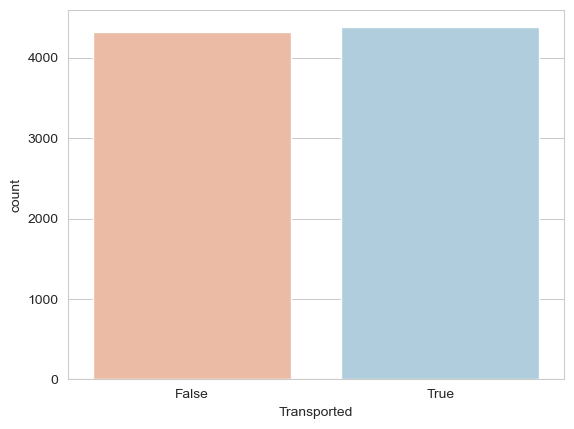

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', data=df_train, palette='RdBu');

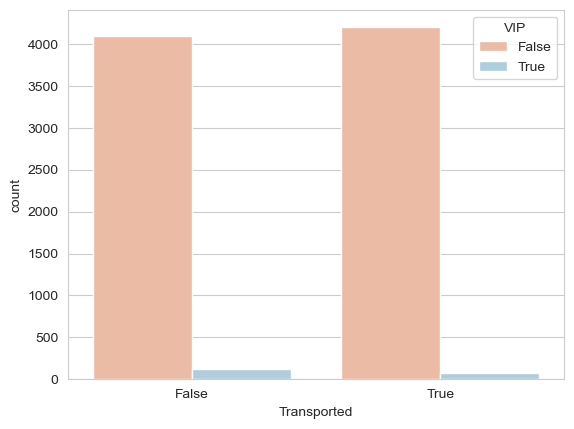

In [32]:
sns.countplot(x='Transported', hue='VIP', data=df_train, palette='RdBu');

Interestingly, looks like if you are VIP, you have less chance to be transported. Congrats ;)

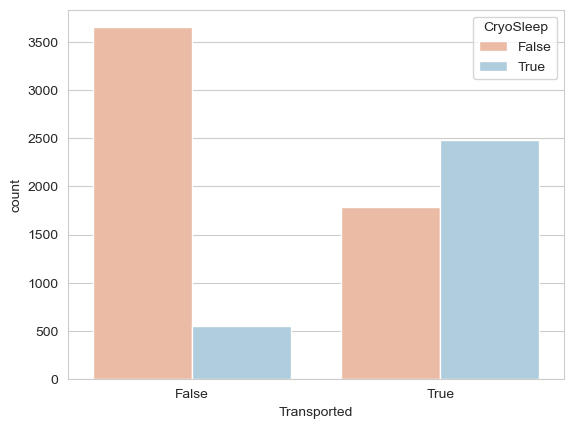

In [33]:
sns.countplot(x='Transported', hue='CryoSleep', data=df_train, palette='RdBu');

But being poor doesn't mean as much, as choosing CryoSleep.

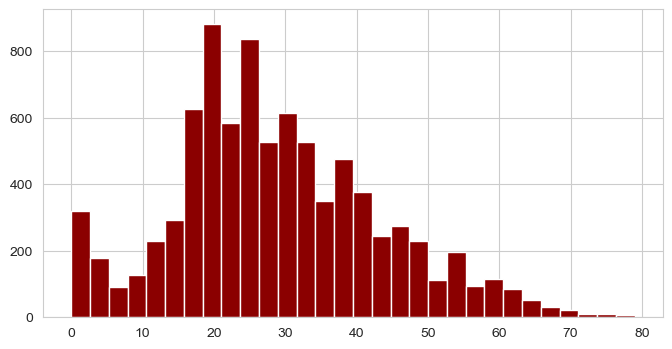

In [43]:
df_train.Age.hist(color='darkred', bins=30, figsize=(8,4));

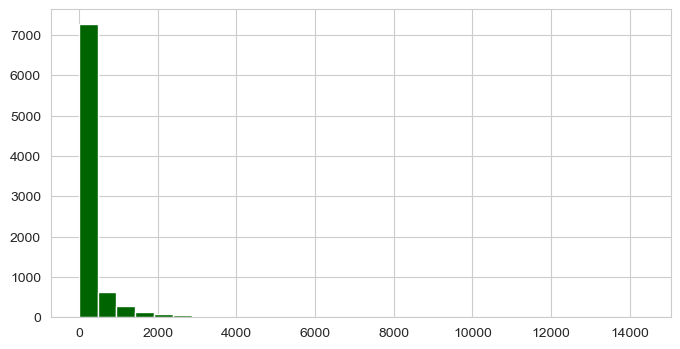

In [45]:
df_train.RoomService.hist(color='darkgreen', bins=30, figsize=(8,4));

## Data Cleaning

From the begining, I will drop Name column in both datasets.

In [71]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

### Dealing with Nulls

We want to fill in missing data instead of just dropping it. Let's start with Age column. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age for VIPs and non-VIPs.

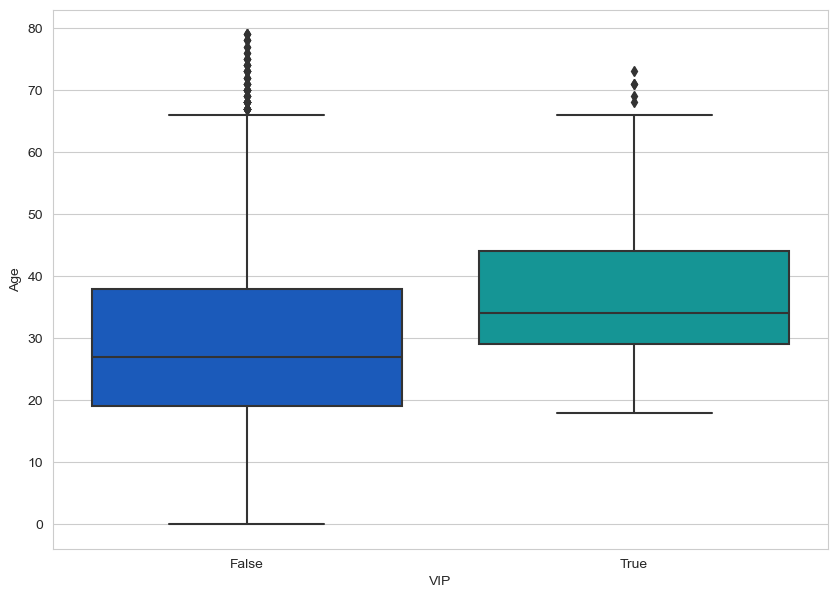

In [55]:
plt.figure(figsize=(10,7))
sns.boxplot(x='VIP', y='Age', data=df_train, palette='winter');

In [59]:
not_vip_train = df_train[df_train.VIP == False]['Age'].mean()
vip_train = df_train[df_train.VIP == True]['Age'].mean()
not_vip_test = df_test[df_test.VIP == False]['Age'].mean()
vip_test = df_test[df_test.VIP == True]['Age'].mean()

print(f"The average age for VIP in train data set: {vip_train}.")
print(f"The average age for VIP in test data set: {vip_test}.")
print(f"The average age for non-VIP in train data set: {not_vip_train}.")
print(f"The average age for non-VIP in test data set: {not_vip_test}.")

The average age for VIP in train data set: 37.44949494949495.
The average age for VIP in test data set: 34.534246575342465.
The average age for non-VIP in train data set: 28.639610789506097.
The average age for non-VIP in test data set: 28.487447178722345.


There is definitely a correlation. Let's use is to impute missing values in our Age column.

In [62]:
def impute_age(cols):
    Age = cols[0]
    VIP = cols[1]

    if pd.isnull(Age):

        if VIP:
            return 36       # average age between datasets
        else:
            return 28.5
        
    else:
        return Age

In [63]:
df_train['Age'] = df_train[['Age', 'VIP']].apply(impute_age, axis=1)
df_test['Age'] = df_test[['Age', 'VIP']].apply(impute_age, axis=1)

In [66]:
df_train.Age.isnull().sum()

0

I guess we can do the same for all numerical columns, as they as all are correlated with whether the person is VIP or not. But I will leave it for tomorrow. Or if you want, feel free to improve my code above and include all numerical columns.

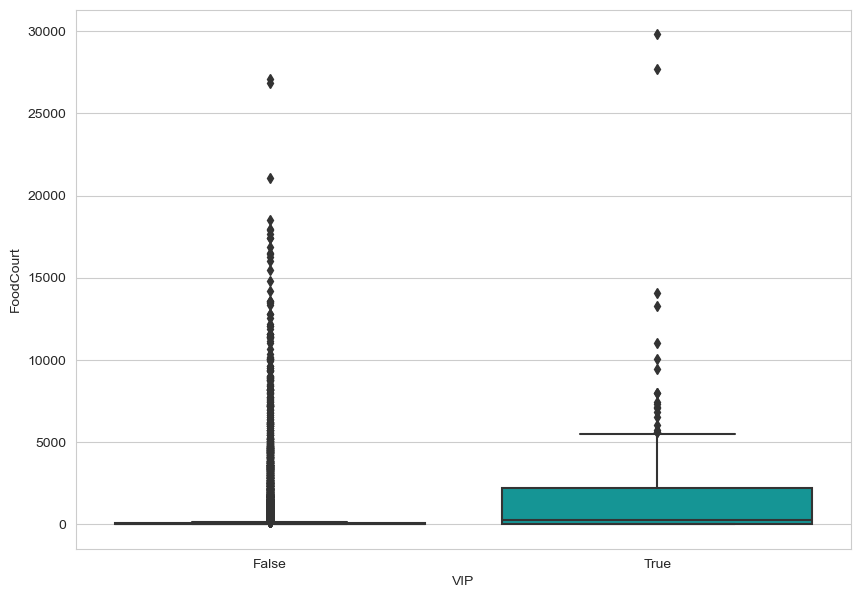

In [109]:
plt.figure(figsize=(10,7))
sns.boxplot(x='VIP', y='FoodCourt', data=df_train, palette='winter');

For categorical columns, we can simply impute the most common value.

In [110]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'] 

In [102]:
# Most common values in each column
modes = df_train[categorical_columns].mode().iloc[0]
modes

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Name: 0, dtype: object

In [103]:
# test dataset has the same common values
df_test[categorical_columns].mode().iloc[0]

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Name: 0, dtype: object

In [107]:
df_train[categorical_columns] = df_train[categorical_columns].fillna(modes)
df_test[categorical_columns] = df_test[categorical_columns].fillna(modes)

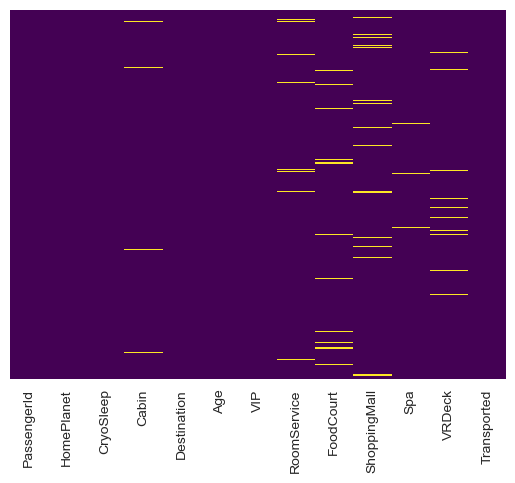

In [108]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Feel free change and add whatever you want. I am done for today. bye-bye ;*